# Mapping a Network using Web Crawling and computing Link Predcitions
#### Alan Peraza Torres - Data Engineering - Group 8A

# Part 1: Obtaining friends lists via Web Crawling.

In [4]:
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.common.keys import Keys

In [3]:
import time
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import pprint

In [6]:
# Libraries for network mapping
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable
import collections
from operator import itemgetter
import itertools

In [ ]:
class facebook_friends:
    
    def __int__(driver, my_friends_final, mutual_friends_final):
        self.driver = driver
        self.my_friends_final = my_friends_final
        self.mutual_friends_final = mutual_friends_final
        
        # This section is used for chromedriver, which will control the "human-like" behavior of the web crawling
    def log_in(self, username, password):
        
        """
        This methods logs into facebook with a username and password given.
        """
        
        chrome_options = webdriver.ChromeOptions()
        
        prefs = {"profile.default_content_setting_values.notifications": 2}
        
        chrome_options.add_experimental_option("prefs", prefs)
        
        self.driver = webdriver.Chrome(chrome_options = chrome_options)
        
        self.driver.get('http://www.facebook.com/')
        
        elem = self.driver.find_element_by_id("email")
        
        elem.send_keys(username)
        
        elem = self.driver.find_element_by_id("pass")
        
        elem.send_keys(password)
        
        elem.send_keys(Keys.RETURN)
        
        time.sleep(5)
        
        
    def go_profile(self, profile_name, friend_type):
        """
        This method look enters into a facebook profile and looks for the "friends" page.
        """

        self.driver.get("https://web.facebook.com/{}/{}".format(profile_name, friend_type))
        
        time.sleep(2)
        
        
        
    def scroll_down(self):
        """
        This method scrolls down all over the friends section until there are no contacts left
        """
        
        old_page = self.driver.page_source
        
        while True:
            
            for i in range(2):
                self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                
                time.sleep(3)
                
            new_page = self.driver.page_source
            
            if new_page != old_page
            
                old_page = new_page
                
            else:
                
                break
    
    def get_my_friend_list(self):
        html = self.driver.page_source
        soup = BeautifulSoup(html, "html.parser")
        
        # Friends
        tag = 'a'
        find_class = "oajrlxb2 g5ia77u1 qu0x051f esr5mh6w e9989ue4 r7d6kgcz rq0escxv nhd2j8a9 nc684nl6 p7hjln8o kvgmc6g5 cxmmr5t8 oygrvhab hcukyx3x jb3vyjys rz4wbd8a qt6c0cv9 a8nywdso i1ao9s8h esuyzwwr f1sip0of lzcic4wl gmql0nx0 gpro0wi8"
        names_raw = soup.find_all(tag, class_ = find_class)
        
        # Names
        names = []
        for i in names_raw:
            names.append(i.get_text())


        regex = 'https://www.facebook.com/([a-zA-Z0-9,.]+)'
        url_name = re.findall(regex, str(names_raw))
        
        # Delete no names or url name
        names = names[:-17]
        url_name = url_name[:-17]

        my_friends = list(zip(names, url_name))


        self.my_friends_final = list(filter(lambda x: x[1] != "profile.php", my_friends))
        
    
    def get_mutual_friends(self):
        try:
            
            html = self.driver.page_source
            soup = BeautifulSoup(html, "html.parser")
            
            # Friends
            tag = 'a'
            find_class = "oajrlxb2 g5ia77u1 qu0x051f esr5mh6w e9989ue4 r7d6kgcz rq0escxv nhd2j8a9 nc684nl6 p7hjln8o kvgmc6g5 cxmmr5t8 oygrvhab hcukyx3x jb3vyjys rz4wbd8a qt6c0cv9 a8nywdso i1ao9s8h esuyzwwr f1sip0of lzcic4wl gmql0nx0 gpro0wi8"
            names_raw = soup.find_all(tag, class_ = find_class)

            # Names
            names = []
            for i in names_raw:
                names.append(i.get_text())

            regex = 'https://www.facebook.com/([a-zA-Z0-9,.]+)'
            url_name = re.findall(regex, str(names_raw))

            friends = list(zip(names, url_name))

            # Remove "profile.php"
            friends = list(filter(lambda x: x[1] != "profile.php", friends))

            mutual_friends = [(val1,val2) for val1,val2 in self.my_friends_final for val3,val4 in friends if val2 == val4]
            self.mutual_friends_final = list(list(zip(*mutual_friends))[1])
        except:
            self.mutual_friends_final = [None]
            pass
                
    def create_dict_friends(self):

        friends_url_name = list(zip(*self.my_friends_final))[1]
        dict_friends = {}
        counter = 0
        for friend_name in friends_url_name:
            counter += 1
            print("counter: ", counter)
            self.go_profile(friend_name, "friends_mutual")
            self.scroll_down()
            self.get_mutual_friends()
            values_dict = self.mutual_friends_final
            if friend_name not in dict_friends:
                dict_friends[friend_name] = values_dict 
                
        return dict_friends
        
        
# Using the class. Introducing username and password        
def main():
    # Log in data
    user = "userhere"
    password = "passwordhere"
    user_profile = "userprofile"
    type_friend = "friends"
    
    # class
    Facebook = facebook_friends()
    
    # Methods
    # 1. Log into Facebook.com using my account and password
    Facebook.log_in(user, password)
    
    # Enter my profile and look for the friends section
    Facebook.go_profile(user_profile, type_friend)
    
    # Scroll down to reach all possible friends
    Facebook.scroll_down()
    
    # Create a list of lists of friends
    Facebook.get_my_friend_list()
    
    # Convert the list into a dictionary
    friends = Facebook.create_dict_friends()
        
    return friends 

In [ ]:
dict_friends = main()

<ipython-input-4-66f2d636b0e2>:13: DeprecationWarning: use options instead of chrome_options
  self.driver = webdriver.Chrome(chrome_options = chrome_options)


counter:  1
counter:  2
counter:  3
counter:  4
counter:  5
counter:  6
counter:  7
counter:  8
counter:  9
counter:  10
counter:  11
counter:  12
counter:  13
counter:  14
counter:  15
counter:  16
counter:  17
counter:  18
counter:  19
counter:  20
counter:  21
counter:  22
counter:  23
counter:  24
counter:  25
counter:  26
counter:  27
counter:  28
counter:  29
counter:  30
counter:  31
counter:  32
counter:  33
counter:  34
counter:  35
counter:  36
counter:  37
counter:  38
counter:  39
counter:  40
counter:  41
counter:  42


# Part 2: Preprocessing

In [ ]:
# Replace friends' contacts with no friends in common with my name
for key, value in dict_friends.items():
    
    for common_friend in dict_friends[key]:
        
        if common_friend == None:
            
            dict_friends[key] = ["username"]

In [ ]:
# Create the pairs of friends
friend_pairs = []

for key, value in dict_friends.items():
    
    friend1 = [key]
    
    friend2 = value
    
    # Compute possible combinations of pairs of friends
    friend_pairs.append(list(itertools.product(friend1, friend2)))

In [ ]:
# Show friends for contact(node) number 10 
friend_pairs[10]

[('papo.graniel', 'davidandres.menchuvillegas'),
 ('papo.graniel', 'donovan.sanchez.3154'),
 ('papo.graniel', 'jesus.lizama.3'),
 ('papo.graniel', 'pamela.gutierrezcocom'),
 ('papo.graniel', 'perazadriana'),
 ('papo.graniel', 'naoo.perez')]

In [ ]:
# Add my contact as a friend for all contacts in the network
for contact in range(len(friend_pairs)):
    
    friend_pairs[contact].append((friend_pairs[contact][0][0], "simonnelson.cook.560"))

In [ ]:
# Show friends for contact(node) number 10
# Must return same names plus mine
friend_pairs[10]

[('papo.graniel', 'davidandres.menchuvillegas'),
 ('papo.graniel', 'donovan.sanchez.3154'),
 ('papo.graniel', 'jesus.lizama.3'),
 ('papo.graniel', 'pamela.gutierrezcocom'),
 ('papo.graniel', 'perazadriana'),
 ('papo.graniel', 'naoo.perez'),
 ('papo.graniel', 'simonnelson.cook.560')]

# Part 3: Mapping process. Visualizing the network

In [ ]:
# Create an edgelist based on the friends connections
edgelist = [contact for friendList in friend_pairs for contact in friendList]

In [ ]:
edgelist

[('yannick.sierra.98', 'Tokiyomi'),
 ('yannick.sierra.98', 'anavioleta.raguesortiz'),
 ('yannick.sierra.98', 'abby.cervera'),
 ('yannick.sierra.98', 'eduardo.ortegaortiz'),
 ('yannick.sierra.98', 'simonnelson.cook.560'),
 ('aditax.alfarocadena', 'davidandres.menchuvillegas'),
 ('aditax.alfarocadena', 'donovan.sanchez.3154'),
 ('aditax.alfarocadena', 'jesus.lizama.3'),
 ('aditax.alfarocadena', 'mauricio.chisosa'),
 ('aditax.alfarocadena', 'alejandra.lunaalcocer'),
 ('aditax.alfarocadena', 'montserrat.zapatavargas'),
 ('aditax.alfarocadena', 'simonnelson.cook.560'),
 ('davidandres.menchuvillegas', 'aditax.alfarocadena'),
 ('davidandres.menchuvillegas', 'donovan.sanchez.3154'),
 ('davidandres.menchuvillegas', 'jesus.lizama.3'),
 ('davidandres.menchuvillegas', 'mauricio.chisosa'),
 ('davidandres.menchuvillegas', 'alejandra.lunaalcocer'),
 ('davidandres.menchuvillegas', 'jimena.pavonbonilla'),
 ('davidandres.menchuvillegas', 'montserrat.zapatavargas'),
 ('davidandres.menchuvillegas', 'simon

In [8]:
# This was done so Colab could read it
edgelist = [('yannick.sierra.98', 'Tokiyomi'),
 ('yannick.sierra.98', 'anavioleta.raguesortiz'),
 ('yannick.sierra.98', 'abby.cervera'),
 ('yannick.sierra.98', 'eduardo.ortegaortiz'),
 ('yannick.sierra.98', 'simonnelson.cook.560'),
 ('aditax.alfarocadena', 'davidandres.menchuvillegas'),
 ('aditax.alfarocadena', 'donovan.sanchez.3154'),
 ('aditax.alfarocadena', 'jesus.lizama.3'),
 ('aditax.alfarocadena', 'mauricio.chisosa'),
 ('aditax.alfarocadena', 'alejandra.lunaalcocer'),
 ('aditax.alfarocadena', 'montserrat.zapatavargas'),
 ('aditax.alfarocadena', 'simonnelson.cook.560'),
 ('davidandres.menchuvillegas', 'aditax.alfarocadena'),
 ('davidandres.menchuvillegas', 'donovan.sanchez.3154'),
 ('davidandres.menchuvillegas', 'jesus.lizama.3'),
 ('davidandres.menchuvillegas', 'mauricio.chisosa'),
 ('davidandres.menchuvillegas', 'alejandra.lunaalcocer'),
 ('davidandres.menchuvillegas', 'jimena.pavonbonilla'),
 ('davidandres.menchuvillegas', 'montserrat.zapatavargas'),
 ('davidandres.menchuvillegas', 'simonnelson.cook.560'),
 ('OriginOfOswaldo', 'Tokiyomi'),
 ('OriginOfOswaldo', 'anavioleta.raguesortiz'),
 ('OriginOfOswaldo', 'fati.martinez.986'),
 ('OriginOfOswaldo', 'dgamboa93'),
 ('OriginOfOswaldo', 'simonnelson.cook.560'),
 ('Kruang1', 'Tokiyomi'),
 ('Kruang1', 'anavioleta.raguesortiz'),
 ('Kruang1', 'fati.martinez.986'),
 ('Kruang1', 'dgamboa93'),
 ('Kruang1', 'hectorxdxd.hernandez'),
 ('Kruang1', 'adrianroberto.carmonarodriguez'),
 ('Kruang1', 'simonnelson.cook.560'),
 ('donovan.sanchez.3154', 'aditax.alfarocadena'),
 ('donovan.sanchez.3154', 'davidandres.menchuvillegas'),
 ('donovan.sanchez.3154', 'alejandra.lunaalcocer'),
 ('donovan.sanchez.3154', 'perazadriana'),
 ('donovan.sanchez.3154', 'eduardo.ortegaortiz'),
 ('donovan.sanchez.3154', 'hectorxdxd.hernandez'),
 ('donovan.sanchez.3154', 'simonnelson.cook.560'),
 ('jesus.lizama.3', 'aditax.alfarocadena'),
 ('jesus.lizama.3', 'davidandres.menchuvillegas'),
 ('jesus.lizama.3', 'donovan.sanchez.3154'),
 ('jesus.lizama.3', 'alejandra.lunaalcocer'),
 ('jesus.lizama.3', 'jimena.pavonbonilla'),
 ('jesus.lizama.3', 'perazadriana'),
 ('jesus.lizama.3', 'eduardo.ortegaortiz'),
 ('jesus.lizama.3', 'simonnelson.cook.560'),
 ('Tokiyomi', 'Kruang1'),
 ('Tokiyomi', 'janeet.rosaado'),
 ('Tokiyomi', 'fati.martinez.986'),
 ('Tokiyomi', 'eduardo.ortegaortiz'),
 ('Tokiyomi', 'hectorxdxd.hernandez'),
 ('Tokiyomi', 'adrianroberto.carmonarodriguez'),
 ('Tokiyomi', 'simonnelson.cook.560'),
 ('janeet.rosaado', 'OriginOfOswaldo'),
 ('janeet.rosaado', 'Tokiyomi'),
 ('janeet.rosaado', 'mario.morales.1441'),
 ('janeet.rosaado', 'fati.martinez.986'),
 ('janeet.rosaado', 'simonnelson.cook.560'),
 ('margeli.torres', 'perazadriana'),
 ('margeli.torres', 'margot.torres1'),
 ('margeli.torres', 'simonnelson.cook.560'),
 ('papo.graniel', 'davidandres.menchuvillegas'),
 ('papo.graniel', 'donovan.sanchez.3154'),
 ('papo.graniel', 'jesus.lizama.3'),
 ('papo.graniel', 'pamela.gutierrezcocom'),
 ('papo.graniel', 'perazadriana'),
 ('papo.graniel', 'naoo.perez'),
 ('papo.graniel', 'simonnelson.cook.560'),
 ('aaron.p.torres', 'perazadriana'),
 ('aaron.p.torres', 'margot.torres1'),
 ('aaron.p.torres', 'simonnelson.cook.560'),
 ('monserrat.rubiogomez', 'davidandres.menchuvillegas'),
 ('monserrat.rubiogomez', 'donovan.sanchez.3154'),
 ('monserrat.rubiogomez', 'jesus.lizama.3'),
 ('monserrat.rubiogomez', 'pamela.gutierrezcocom'),
 ('monserrat.rubiogomez', 'naoo.perez'),
 ('monserrat.rubiogomez', 'montserrat.zapatavargas'),
 ('monserrat.rubiogomez', 'simonnelson.cook.560'),
 ('xiadani.barrera', 'Tokiyomi'),
 ('xiadani.barrera', 'mario.morales.1441'),
 ('xiadani.barrera', 'fati.martinez.986'),
 ('xiadani.barrera', 'eduardo.ortegaortiz'),
 ('xiadani.barrera', 'KarlaAvilesTejero'),
 ('xiadani.barrera', 'simonnelson.cook.560'),
 ('sergio.barroso.165', 'aditax.alfarocadena'),
 ('sergio.barroso.165', 'davidandres.menchuvillegas'),
 ('sergio.barroso.165', 'donovan.sanchez.3154'),
 ('sergio.barroso.165', 'jesus.lizama.3'),
 ('sergio.barroso.165', 'alejandra.lunaalcocer'),
 ('sergio.barroso.165', 'jimena.pavonbonilla'),
 ('sergio.barroso.165', 'perazadriana'),
 ('sergio.barroso.165', 'simonnelson.cook.560'),
 ('mauricio.chisosa', 'aditax.alfarocadena'),
 ('mauricio.chisosa', 'davidandres.menchuvillegas'),
 ('mauricio.chisosa', 'jesus.lizama.3'),
 ('mauricio.chisosa', 'perazadriana'),
 ('mauricio.chisosa', 'naoo.perez'),
 ('mauricio.chisosa', 'montserrat.zapatavargas'),
 ('mauricio.chisosa', 'simonnelson.cook.560'),
 ('mario.morales.1441', 'Tokiyomi'),
 ('mario.morales.1441', 'anavioleta.raguesortiz'),
 ('mario.morales.1441', 'dgamboa93'),
 ('mario.morales.1441', 'adrianroberto.carmonarodriguez'),
 ('mario.morales.1441', 'simonnelson.cook.560'),
 ('vanessa.lezama.54', 'anavioleta.raguesortiz'),
 ('vanessa.lezama.54', 'abby.cervera'),
 ('vanessa.lezama.54', 'KarlaAvilesTejero'),
 ('vanessa.lezama.54', 'simonnelson.cook.560'),
 ('alejandra.lunaalcocer', 'aditax.alfarocadena'),
 ('alejandra.lunaalcocer', 'davidandres.menchuvillegas'),
 ('alejandra.lunaalcocer', 'donovan.sanchez.3154'),
 ('alejandra.lunaalcocer', 'jesus.lizama.3'),
 ('alejandra.lunaalcocer', 'naoo.perez'),
 ('alejandra.lunaalcocer', 'montserrat.zapatavargas'),
 ('alejandra.lunaalcocer', 'simonnelson.cook.560'),
 ('marifer.ortiz.58', 'anavioleta.raguesortiz'),
 ('marifer.ortiz.58', 'abby.cervera'),
 ('marifer.ortiz.58', 'eduardo.ortegaortiz'),
 ('marifer.ortiz.58', 'simonnelson.cook.560'),
 ('jimena.pavonbonilla', 'davidandres.menchuvillegas'),
 ('jimena.pavonbonilla', 'jesus.lizama.3'),
 ('jimena.pavonbonilla', 'sergio.barroso.165'),
 ('jimena.pavonbonilla', 'eduardo.ortegaortiz'),
 ('jimena.pavonbonilla', 'montserrat.zapatavargas'),
 ('jimena.pavonbonilla', 'simonnelson.cook.560'),
 ('anavioleta.raguesortiz', 'Kruang1'),
 ('anavioleta.raguesortiz', 'abby.cervera'),
 ('anavioleta.raguesortiz', 'KarlaAvilesTejero'),
 ('anavioleta.raguesortiz', 'simonnelson.cook.560'),
 ('carlos.floresperez.9', 'Tokiyomi'),
 ('carlos.floresperez.9', 'anavioleta.raguesortiz'),
 ('carlos.floresperez.9', 'KarlaAvilesTejero'),
 ('carlos.floresperez.9', 'simonnelson.cook.560'),
 ('abby.cervera', 'marifer.ortiz.58'),
 ('abby.cervera', 'anavioleta.raguesortiz'),
 ('abby.cervera', 'eduardo.ortegaortiz'),
 ('abby.cervera', 'simonnelson.cook.560'),
 ('pamela.gutierrezcocom', 'davidandres.menchuvillegas'),
 ('pamela.gutierrezcocom', 'jesus.lizama.3'),
 ('pamela.gutierrezcocom', 'monserrat.rubiogomez'),
 ('pamela.gutierrezcocom', 'mauricio.chisosa'),
 ('pamela.gutierrezcocom', 'naoo.perez'),
 ('pamela.gutierrezcocom', 'montserrat.zapatavargas'),
 ('pamela.gutierrezcocom', 'adrianroberto.carmonarodriguez'),
 ('pamela.gutierrezcocom', 'simonnelson.cook.560'),
 ('perazadriana', 'donovan.sanchez.3154'),
 ('perazadriana', 'aaron.p.torres'),
 ('perazadriana', 'andre.perazatorres'),
 ('perazadriana', 'abraham.lunalopez'),
 ('perazadriana', 'federico.witzil'),
 ('perazadriana', 'brianda.peraza.7'),
 ('perazadriana', 'simonnelson.cook.560'),
 ('fati.martinez.986', 'Kruang1'),
 ('fati.martinez.986', 'Tokiyomi'),
 ('fati.martinez.986', 'janeet.rosaado'),
 ('fati.martinez.986', 'dgamboa93'),
 ('fati.martinez.986', 'hectorxdxd.hernandez'),
 ('fati.martinez.986', 'adrianroberto.carmonarodriguez'),
 ('fati.martinez.986', 'simonnelson.cook.560'),
 ('andre.perazatorres', 'perazadriana'),
 ('andre.perazatorres', 'margot.torres1'),
 ('andre.perazatorres', 'simonnelson.cook.560'),
 ('dgamboa93', 'Kruang1'),
 ('dgamboa93', 'mario.morales.1441'),
 ('dgamboa93', 'fati.martinez.986'),
 ('dgamboa93', 'hectorxdxd.hernandez'),
 ('dgamboa93', 'adrianroberto.carmonarodriguez'),
 ('dgamboa93', 'simonnelson.cook.560'),
 ('eduardo.ortegaortiz', 'donovan.sanchez.3154'),
 ('eduardo.ortegaortiz', 'jesus.lizama.3'),
 ('eduardo.ortegaortiz', 'Tokiyomi'),
 ('eduardo.ortegaortiz', 'jimena.pavonbonilla'),
 ('eduardo.ortegaortiz', 'abby.cervera'),
 ('eduardo.ortegaortiz', 'simonnelson.cook.560'),
 ('abraham.lunalopez', 'perazadriana'),
 ('abraham.lunalopez', 'margot.torres1'),
 ('abraham.lunalopez', 'simonnelson.cook.560'),
 ('naoo.perez', 'aditax.alfarocadena'),
 ('naoo.perez', 'davidandres.menchuvillegas'),
 ('naoo.perez', 'donovan.sanchez.3154'),
 ('naoo.perez', 'jesus.lizama.3'),
 ('naoo.perez', 'mauricio.chisosa'),
 ('naoo.perez', 'alejandra.lunaalcocer'),
 ('naoo.perez', 'eduardo.ortegaortiz'),
 ('naoo.perez', 'montserrat.zapatavargas'),
 ('naoo.perez', 'simonnelson.cook.560'),
 ('hectorxdxd.hernandez', 'Kruang1'),
 ('hectorxdxd.hernandez', 'donovan.sanchez.3154'),
 ('hectorxdxd.hernandez', 'Tokiyomi'),
 ('hectorxdxd.hernandez', 'fati.martinez.986'),
 ('hectorxdxd.hernandez', 'dgamboa93'),
 ('hectorxdxd.hernandez', 'adrianroberto.carmonarodriguez'),
 ('hectorxdxd.hernandez', 'simonnelson.cook.560'),
 ('montserrat.zapatavargas', 'aditax.alfarocadena'),
 ('montserrat.zapatavargas', 'davidandres.menchuvillegas'),
 ('montserrat.zapatavargas', 'donovan.sanchez.3154'),
 ('montserrat.zapatavargas', 'jesus.lizama.3'),
 ('montserrat.zapatavargas', 'alejandra.lunaalcocer'),
 ('montserrat.zapatavargas', 'jimena.pavonbonilla'),
 ('montserrat.zapatavargas', 'perazadriana'),
 ('montserrat.zapatavargas', 'simonnelson.cook.560'),
 ('federico.witzil', 'perazadriana'),
 ('federico.witzil', 'margot.torres1'),
 ('federico.witzil', 'simonnelson.cook.560'),
 ('adrianroberto.carmonarodriguez', 'Kruang1'),
 ('adrianroberto.carmonarodriguez', 'Tokiyomi'),
 ('adrianroberto.carmonarodriguez', 'fati.martinez.986'),
 ('adrianroberto.carmonarodriguez', 'dgamboa93'),
 ('adrianroberto.carmonarodriguez', 'hectorxdxd.hernandez'),
 ('adrianroberto.carmonarodriguez', 'simonnelson.cook.560'),
 ('roger.ricolino', 'Kruang1'),
 ('roger.ricolino', 'Tokiyomi'),
 ('roger.ricolino', 'janeet.rosaado'),
 ('roger.ricolino', 'fati.martinez.986'),
 ('roger.ricolino', 'hectorxdxd.hernandez'),
 ('roger.ricolino', 'simonnelson.cook.560'),
 ('brianda.peraza.7', 'perazadriana'),
 ('brianda.peraza.7', 'margot.torres1'),
 ('brianda.peraza.7', 'simonnelson.cook.560'),
 ('margot.torres1', 'aaron.p.torres'),
 ('margot.torres1', 'perazadriana'),
 ('margot.torres1', 'andre.perazatorres'),
 ('margot.torres1', 'abraham.lunalopez'),
 ('margot.torres1', 'federico.witzil'),
 ('margot.torres1', 'brianda.peraza.7'),
 ('margot.torres1', 'simonnelson.cook.560'),
 ('RSosa33', 'Kruang1'),
 ('RSosa33', 'Tokiyomi'),
 ('RSosa33', 'janeet.rosaado'),
 ('RSosa33', 'fati.martinez.986'),
 ('RSosa33', 'adrianroberto.carmonarodriguez'),
 ('RSosa33', 'simonnelson.cook.560'),
 ('KarlaAvilesTejero', 'Tokiyomi'),
 ('KarlaAvilesTejero', 'anavioleta.raguesortiz'),
 ('KarlaAvilesTejero', 'simonnelson.cook.560'),
 ('oscinarf', 'perazadriana'),
 ('oscinarf', 'simonnelson.cook.560')]

In [9]:
# Create a graph object and add edge list
G = nx.Graph()

G.add_edges_from(edgelist)

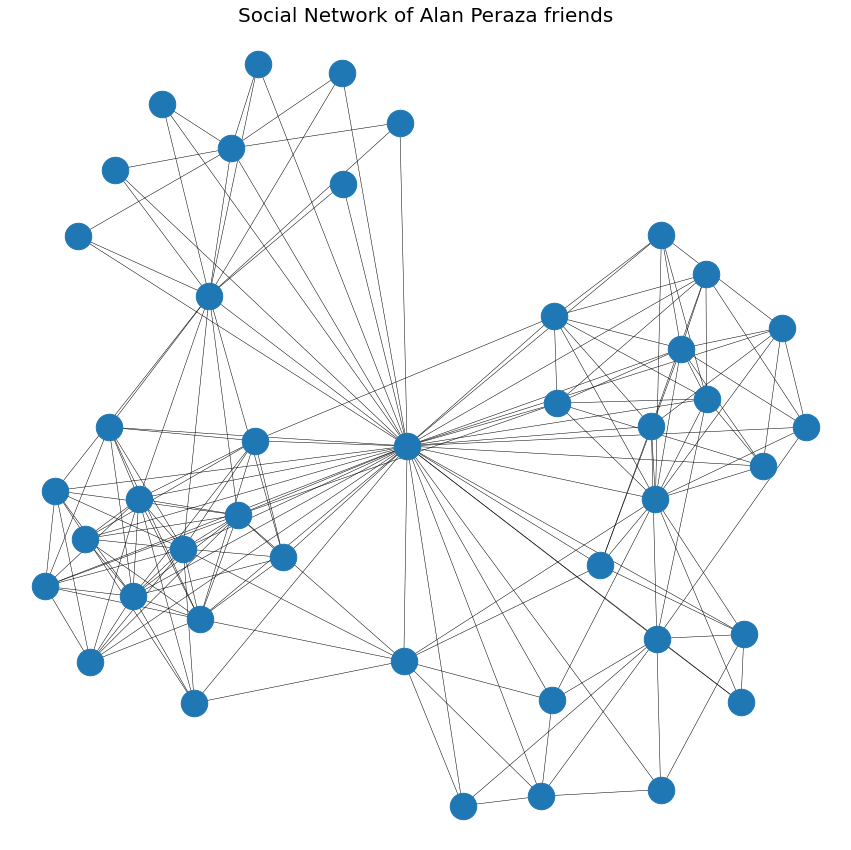

In [15]:
# Basic display of the network
plt.figure(figsize = (15, 15))
plt.axis('off')
plt.title('Social Network of Alan Peraza friends', size = 20)
nx.draw_networkx(G, with_labels = False, node_size = 700, alpha = 1, width = 0.5)
plt.savefig("Network Image Alan Peraza friends.png", dpi = 500)

In [17]:
# Basic information of the network
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 43
Number of edges: 179
Average degree:   8.3256


In [18]:
# Average path lenght
nx.average_shortest_path_length(G)

1.8017718715393134

In [19]:
# Density of the network
nx.density(G)

0.1982281284606866

In [20]:
# DISTANCE METRICS
# Diameter
nx.diameter(G)

2

In [21]:
# EigenCentrality
eigen_centrality = nx.eigenvector_centrality(G)
sorted(eigen_centrality, key = eigen_centrality.get, reverse=True)[:10]

['simonnelson.cook.560',
 'jesus.lizama.3',
 'davidandres.menchuvillegas',
 'donovan.sanchez.3154',
 'montserrat.zapatavargas',
 'naoo.perez',
 'perazadriana',
 'aditax.alfarocadena',
 'pamela.gutierrezcocom',
 'alejandra.lunaalcocer']

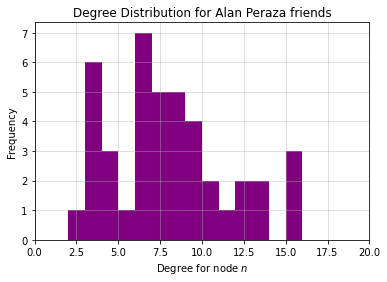

In [28]:
# Degree distribution
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees, bins = 40, histtype = 'stepfilled', color = 'purple')
plt.title("Degree Distribution for Alan Peraza friends")
plt.ylabel("Frequency")
plt.xlabel("Degree for node $n$")

plt.xlim(right = 20, left = 0)

plt.grid(True, alpha = 0.5)

plt.savefig("Degree Distribution Alan Peraza.png")
plt.show()